[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Milite/Data-Scinece/blob/master/686_Project_Seedlings_Meng_Luo.ipynb)

# MSDS686 Project - Plant Seedlings Classification  V0.0
The porject is provided by Kaggle [https://www.kaggle.com/c/plant-seedlings-classification]

## Introduction
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of approximately 960 unique plants belonging to 12 species at several growth stages. The goal of the competition is to create a classifier capable of determining a plant's species from a photo. And we will build CNN models to predict the type of the plants.

In [0]:
## Global varibles
dataset_path = "drive/My Drive/Colab Notebooks/Kaggle Data/Plant Seedlings Classification"
splitno_path = 4  # How many '/' exists in the dataset path
reduce_scale  = 64 # Train with images resized to this many pixels.
reduce_frac   = 0.1 # Train with this fraction of data first. (Due to limited resources.)
seed         = 42 # Set random seed


In [1]:
## Loading in Data using google drive
#REFERENCE https://colab.research.google.com/drive/1srw_HFWQ2SMgmWIawucXfusGzrj1_U0q#scrollTo=H4SJ-tGNkOeY
# Originally posted in discussion board by Kat. https://worldclass.regis.edu/d2l/le/224600/discussions/threads/1339444/View 
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
## Load models
import numpy as np
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K
import os
import glob
import cv2
import random

In [119]:
### Create dataset
## REFERENCE: https://www.kaggle.com/vanausloos/how-to-read-images-in-python; https://www.kaggle.com/nikkonst/plant-seedlings-with-cnn-and-image-processing
train_path=dataset_path+"/train"
test_path=dataset_path+"/test"
labels = os.listdir(train_path)
train_files = glob.glob(train_path+'/*/*.png')
## Initially building model with only 'reduce_frac'  of data first. Will remove in the later stage.
# train_files = random.sample(train_files, int(len(train_files)*reduce_frac))
train_labels = [f.split('/')[splitno_path+2] for f in train_files]
test_files = glob.glob(test_path+'/*.png')
## Loading images
train_im = []
j=0
for im in train_files:
    print(j)
    train_im.append(cv2.resize(cv2.imread(im), (reduce_scale, reduce_scale)))  # Get image (with resizing)
    j += 1
test_im = []
j=0
for im in test_files:
    print(j)
    test_im.append(cv2.resize(cv2.imread(im), (reduce_scale, reduce_scale)))  # Get image (with resizing)
    j += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


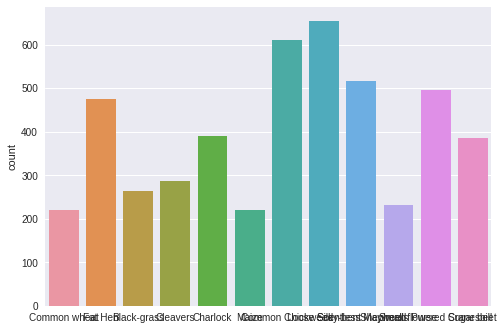

In [28]:
# Explortary Data Analysis
len(train_files) # 4750 photos in the training set.
sns.countplot(train_labels); #To check if the training data is imbalanced. It turns out acceptable. 

In [0]:

train_files = glob.glob(train_path+'/*/*.png')

K.set_image_dim_ordering( 'tf' )

# fix random seed for reproducibility
seed = 123
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channel]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype( 'float32' )
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

def BN_model():
### YOUR TURN
    # Create a model with 4 convolutional layers (2 repeating VGG stype units) and 2 dense layers before the output
    # Use Batch Normalization for every conv and dense layers
    # Use dropout layers if you like
    # Use Adam optimizer
    model = Sequential()
    model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu')) 
    model.add(Conv2D(16, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu')) 
    model.add(Conv2D(16, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(num_classes))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))    
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

# build the model
model = BN_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=20, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 176s - loss: 0.6505 - acc: 0.8864 - val_loss: 0.3064 - val_acc: 0.9671
Epoch 2/20
 - 173s - loss: 0.2163 - acc: 0.9784 - val_loss: 0.1913 - val_acc: 0.9810
Epoch 3/20
 - 173s - loss: 0.1348 - acc: 0.9859 - val_loss: 0.1708 - val_acc: 0.9756
Epoch 4/20
 - 173s - loss: 0.0953 - acc: 0.9895 - val_loss: 0.0885 - val_acc: 0.9898
Epoch 5/20
 - 173s - loss: 0.0727 - acc: 0.9913 - val_loss: 0.0702 - val_acc: 0.9899
Epoch 6/20
 - 173s - loss: 0.0584 - acc: 0.9925 - val_loss: 0.0557 - val_acc: 0.9914
Epoch 7/20
 - 171s - loss: 0.0479 - acc: 0.9930 - val_loss: 0.0481 - val_acc: 0.9917
Epoch 8/20
 - 172s - loss: 0.0398 - acc: 0.9943 - val_loss: 0.0444 - val_acc: 0.9908
Epoch 9/20
 - 173s - loss: 0.0338 - acc: 0.9950 - val_loss: 0.0407 - val_acc: 0.9900
Epoch 10/20
 - 171s - loss: 0.0289 - acc: 0.9958 - val_loss: 0.0421 - val_acc: 0.9915
Epoch 11/20
 - 171s - loss: 0.0258 - acc: 0.9955 - val_loss: 0.0453 - val_acc: 0.9886
Epoch 12/20
 

From the above, can you get test error below 0.5%?

Where should you position the batch norm layer to implement the batch norm correctly?

**Claim:** Some people argue that they can get as good or better result by incorrectly implementing batchnorm such that the batchnorm comes after the activation layer. Test if this is true. What test wrror do you get?

ANSWER:
1. No. val_acc never grows more than 0.9933, so it seems to be overfitted. We may reach it with higher number of output in each layer, but colab is too slow to process that model for the whole assignment.
2. Normally, the batch norm layers are placed right befor the activation(ReLU and dense) layers
3. It is 1.15%, worse than the previous test error (0.82%). 

In [0]:

# Implement Batch Normalization - after the activation 

def BNr_model():
### YOUR TURN
    # Using the same architecture above, 
    # except that the orders of a batchnormalization layer and a activation layer are reversed, 
    # build a model and test if the claim above is true.
    model = Sequential()
    model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1)))
    model.add(Activation('relu')) 
    model.add(BatchNormalization())
    model.add(Conv2D(16, (3, 3)))
    model.add(Activation('relu')) 
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, (3, 3)))
    model.add(Activation('relu')) 
    model.add(BatchNormalization())
    model.add(Conv2D(16, (3, 3)))
    model.add(Activation('relu')) 
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(32))
    model.add(Activation('relu')) 
    model.add(BatchNormalization())
    model.add(Dense(16))
    model.add(Activation('relu')) 
    model.add(BatchNormalization())
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))    
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model
# build the model
model = BNr_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=20, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 179s - loss: 0.5080 - acc: 0.8776 - val_loss: 0.1121 - val_acc: 0.9746
Epoch 2/20
 - 176s - loss: 0.0883 - acc: 0.9799 - val_loss: 0.0603 - val_acc: 0.9851
Epoch 3/20
 - 176s - loss: 0.0523 - acc: 0.9867 - val_loss: 0.0464 - val_acc: 0.9870
Epoch 4/20
 - 177s - loss: 0.0374 - acc: 0.9900 - val_loss: 0.0452 - val_acc: 0.9869
Epoch 5/20
 - 177s - loss: 0.0300 - acc: 0.9923 - val_loss: 0.0326 - val_acc: 0.9904
Epoch 6/20
 - 177s - loss: 0.0237 - acc: 0.9934 - val_loss: 0.0369 - val_acc: 0.9882
Epoch 7/20
 - 176s - loss: 0.0202 - acc: 0.9943 - val_loss: 0.0321 - val_acc: 0.9907
Epoch 8/20
 - 175s - loss: 0.0178 - acc: 0.9953 - val_loss: 0.0329 - val_acc: 0.9901
Epoch 9/20
 - 177s - loss: 0.0157 - acc: 0.9955 - val_loss: 0.0372 - val_acc: 0.9895
Epoch 10/20
 - 177s - loss: 0.0139 - acc: 0.9961 - val_loss: 0.0401 - val_acc: 0.9871
Epoch 11/20
 - 178s - loss: 0.0116 - acc: 0.9966 - val_loss: 0.0271 - val_acc: 0.9920
Epoch 12/20
 

### Recording loss and metric
The output of `model.fit` by default (in Keras 2) returns a dictionary of model history (also it can be called using the callback). The dictionary has keys loss and metric (when you specified the metric in the model.complie) for train and validation each. For our case here it would be: 'val_loss', 'val_acc', 'loss', 'acc'. A good use of such log is to monitor whether it's over fitting. When overfits, you will see the validation loss may go up at some point while train loss continues go down. Let's get rid of batch norm layers and run the model with higher running rate lr=0.01 and longer epoch (50) to see if it overfits (Answer: Yes it does, quite terribly).

In [0]:
## Got disconnected, need to reinitiate the dataset.
# Implement Batch Normalization
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K

K.set_image_dim_ordering( 'tf' )

# fix random seed for reproducibility
seed = 123
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channel]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype( 'float32' )
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

import time
from keras.optimizers import Adam

def model_overfit():
### YOUR TURN
    # 1) Create a model with the same architecture above (4 convs and 2 denses before output) and hyperparameters, 
    # but without any batch normalization and dropouts.
    # 2) To make this overfit surely, let's change the learning rate of our Adam optimizer. Set the learning rate to 0.01.
    # 3) After running the training, plot the train and validation accuracy using the model output hisoty.
    model = Sequential()
    model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1)))
    model.add(Activation('relu')) 
    model.add(Conv2D(16, (3, 3)))
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, (3, 3)))
    model.add(Activation('relu')) 
    model.add(Conv2D(16, (3, 3)))
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(32))
    model.add(Activation('relu')) 
    model.add(Dense(16))
    model.add(Activation('relu')) 
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    adam = Adam(lr=0.01)
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model
# build the model
model = model_overfit()

# Fit the model
t0=time.time()
log = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200, verbose=2)
t1=time.time()
print(t1-t0," seconds")

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

11493376/11490434 [==============================] - 4s 0us/step
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 59s - loss: 0.5390 - acc: 0.8293 - val_loss: 0.1599 - val_acc: 0.9498
Epoch 2/50
 - 59s - loss: 0.1247 - acc: 0.9624 - val_loss: 0.0880 - val_acc: 0.9731
Epoch 3/50
 - 59s - loss: 0.0881 - acc: 0.9731 - val_loss: 0.0809 - val_acc: 0.9729
Epoch 4/50
 - 59s - loss: 0.0691 - acc: 0.9792 - val_loss: 0.0580 - val_acc: 0.9812
Epoch 5/50
 - 60s - loss: 0.0570 - acc: 0.9831 - val_loss: 0.0503 - val_acc: 0.9833
Epoch 6/50
 - 59s - loss: 0.0505 - acc: 0.9850 - val_loss: 0.0410 - val_acc: 0.9866
Epoch 7/50
 - 59s - loss: 0.0461 - acc: 0.9858 - val_loss: 0.0420 - val_acc: 0.9873
Epoch 8/50
 - 60s - loss: 0.0403 - acc: 0.9874 - val_loss: 0.0395 - val_acc: 0.9871
Epoch 9/50
 - 59s - loss: 0.0373 - acc: 0.9884 - val_loss: 0.0434 - val_acc: 0.9850
Epoch 10/50
 - 60s - loss: 0.0343 - acc: 0.9895 - val_loss: 0.0344 - val_acc: 0.9891
Epoch 11/50
 - 60s - loss: 0.0311 - acc: 0.9

#### Tune Learning rate
Without inserting batchnorm or dropout again, decrease learning rate and run for 50 epochs, plot the accuracy from train and validation. What is the highest learning rate that it doesn't overfit? What is the validation accuracy as a result?
ANSWER: It seems the highest learning rate we got is 0.002 with the validation accuracy at 0.9915.

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
Learning rate= 0.005
3012.8676953315735  seconds
CNN Error: 0.85%


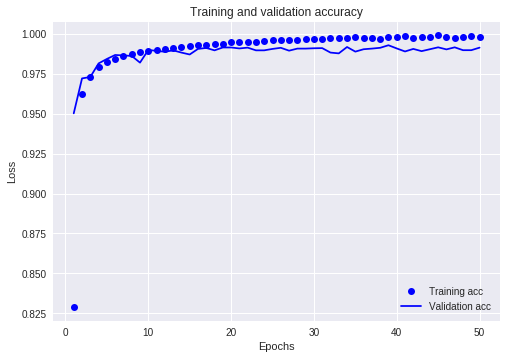

Learning rate= 0.001
3011.640315771103  seconds
CNN Error: 0.89%


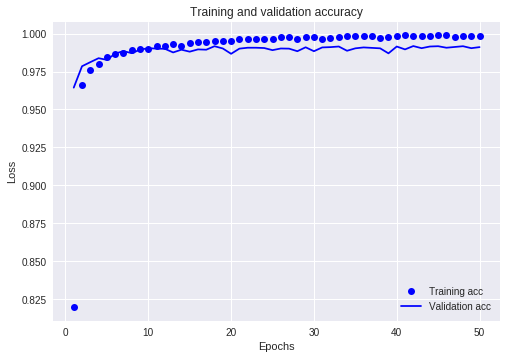

Learning rate= 0.0002
2989.296932697296  seconds
CNN Error: 0.85%


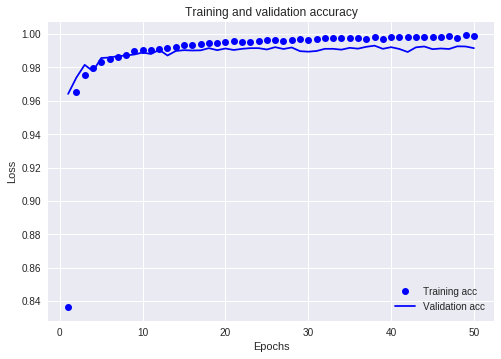

In [0]:
## Got disconnected, need to reinitiate the dataset.
# Implement Batch Normalization
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K

K.set_image_dim_ordering( 'tf' )

# fix random seed for reproducibility
seed = 123
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channel]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype( 'float32' )
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

import time
from keras.optimizers import Adam

#Your code here
import matplotlib.pyplot as plt
def model_lrtuning(lr):
    model = Sequential()
    model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1)))
    model.add(Activation('relu')) 
    model.add(Conv2D(16, (3, 3)))
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, (3, 3)))
    model.add(Activation('relu')) 
    model.add(Conv2D(16, (3, 3)))
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(32))
    model.add(Activation('relu')) 
    model.add(Dense(16))
    model.add(Activation('relu')) 
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    adam = Adam(lr=lr)
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

for x in [0.005, 0.001,0.0002]: #Since colab is slow, we are only testing 3 values for learning rate.
    print("Learning rate=",x)
    model = model_lrtuning(x)
    t0=time.time()
    log = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200, verbose=0)
    t1=time.time()
    print(t1-t0," seconds")
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("CNN Error: %.2f%%" % (100-scores[1]*100))
    #ploting
    history_dict =log.history
    plt.clf()
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    epochs = range(1, len(acc_values) + 1)
    plt.plot(epochs, acc_values, 'bo', label='Training acc')
    plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Learning rate= 1e-05
3051.669180393219  seconds
CNN Error: 1.17%


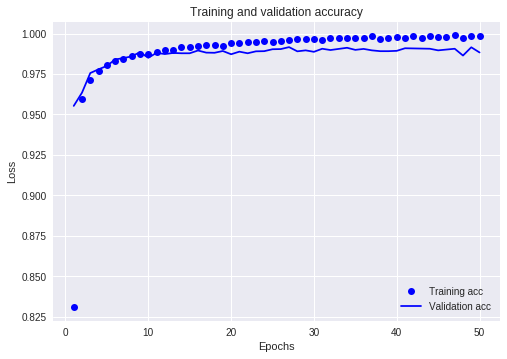

Learning rate= 1e-06


KeyboardInterrupt: ignored

In [0]:
for x in [0.00001, 0.000001,0.0000001]: # Need to try another 3 values for learning rate. Keep them separated to show the previous work
  #Stopped after the first batch since the val_acc dropped significantly. (CNN Error dropped from 0.85% to 1.17%)
    print("Learning rate=",x)
    model = model_lrtuning(x)
    t0=time.time()
    log = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200, verbose=0)
    t1=time.time()
    print(t1-t0," seconds")
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("CNN Error: %.2f%%" % (100-scores[1]*100))
    #ploting
    history_dict =log.history
    plt.clf()
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    epochs = range(1, len(acc_values) + 1)
    plt.plot(epochs, acc_values, 'bo', label='Training acc')
    plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

#### Add Dropout
Now, add dropouts and run with the same hyperparameters (learning rate, epochs) you found from above. Time the model.fit() using `time.time`. 
1) Does it take longer training time by adding dropouts? ANSWER:  It is longer, 79s each epoch versus 60s before. 
2) For the same epoch, is your final validation accuracy better? If not better and you're sure it's not overfitting yet, try to increase either your learning rate or epoch, OR change your dropout rate(s). Record your optimum values. ANSWER: It is not,  (~0.98). I tried increasing the learning rate and/or reduce dropout rate. The best result I have got is 0.9924 with Learning rate= 0.005 and dropout rate= 0.2.

Learning rate= 0.005 dropout rate= 0.2
Train on 60000 samples, validate on 10000 samples
Epoch 1/40
 - 76s - loss: 1.0036 - acc: 0.6566 - val_loss: 0.2844 - val_acc: 0.9465
Epoch 2/40
 - 75s - loss: 0.3878 - acc: 0.8836 - val_loss: 0.1326 - val_acc: 0.9687
Epoch 3/40
 - 75s - loss: 0.2797 - acc: 0.9187 - val_loss: 0.0917 - val_acc: 0.9762
Epoch 4/40
 - 75s - loss: 0.2237 - acc: 0.9370 - val_loss: 0.0822 - val_acc: 0.9815
Epoch 5/40
 - 75s - loss: 0.1932 - acc: 0.9450 - val_loss: 0.0617 - val_acc: 0.9839
Epoch 6/40
 - 75s - loss: 0.1747 - acc: 0.9511 - val_loss: 0.0581 - val_acc: 0.9838
Epoch 7/40
 - 75s - loss: 0.1672 - acc: 0.9538 - val_loss: 0.0529 - val_acc: 0.9855
Epoch 8/40
 - 75s - loss: 0.1550 - acc: 0.9559 - val_loss: 0.0486 - val_acc: 0.9869
Epoch 9/40
 - 75s - loss: 0.1420 - acc: 0.9602 - val_loss: 0.0456 - val_acc: 0.9877
Epoch 10/40
 - 75s - loss: 0.1339 - acc: 0.9622 - val_loss: 0.0451 - val_acc: 0.9885
Epoch 11/40
 - 75s - loss: 0.1268 - acc: 0.9641 - val_loss: 0.0443 - v

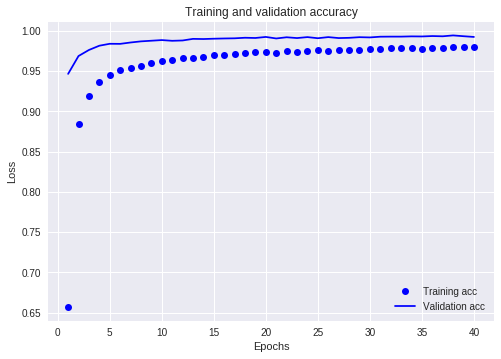

Learning rate= 0.005 dropout rate= 0.5
Train on 60000 samples, validate on 10000 samples
Epoch 1/40
 - 78s - loss: 2.0200 - acc: 0.2464 - val_loss: 1.6583 - val_acc: 0.7243
Epoch 2/40
 - 76s - loss: 1.3094 - acc: 0.5230 - val_loss: 0.9010 - val_acc: 0.8904
Epoch 3/40
 - 76s - loss: 1.0496 - acc: 0.6246 - val_loss: 0.6935 - val_acc: 0.8912
Epoch 4/40
 - 76s - loss: 0.9746 - acc: 0.6517 - val_loss: 0.6464 - val_acc: 0.8605
Epoch 5/40
 - 76s - loss: 0.9181 - acc: 0.6715 - val_loss: 0.5186 - val_acc: 0.8852
Epoch 6/40
 - 77s - loss: 0.8509 - acc: 0.6942 - val_loss: 0.4544 - val_acc: 0.9073
Epoch 7/40


KeyboardInterrupt: ignored

In [0]:
#Your code here
def model_dropout(lr,do):
    model = Sequential()
    model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1)))
    model.add(Dropout(do))
    model.add(Activation('relu')) 
    model.add(Conv2D(16, (3, 3)))
    model.add(Dropout(do))
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, (3, 3)))
    model.add(Dropout(do))
    model.add(Activation('relu')) 
    model.add(Conv2D(16, (3, 3)))
    model.add(Dropout(do))
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(32))
    model.add(Dropout(do))
    model.add(Activation('relu')) 
    model.add(Dense(16))
    model.add(Dropout(do))
    model.add(Activation('relu')) 
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    adam = Adam(lr=lr)
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

#With the same hyperparameters,  
for x in [0.005,0.002]:
  for y in [0.2,0.5]:
    print("Learning rate=",x, "dropout rate=",y)
    model = model_dropout(x,y)
    t0=time.time()
    log = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=200, verbose=2)
    t1=time.time()
    print(t1-t0," seconds")
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("CNN Error: %.2f%%" % (100-scores[1]*100))
    #ploting
    history_dict =log.history
    plt.clf()
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    epochs = range(1, len(acc_values) + 1)
    plt.plot(epochs, acc_values, 'bo', label='Training acc')
    plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

#### Add Batch Normalization
Now, get rid of dropouts and add batch normalization layers. Choose learning rate between 0.01 and 0.001. Find the largest learning rate that still does not overfit but gives highest accuracy.
Time model.fit() using `time.time`. 
Plot the 'acc' and 'val_acc'
Compare the learning rate with those from Exercise 1 and 2. What do you find?
ANSWER: Learning rate 0.008 gives pretty good result without outfitting. Comparing to previous exercise, it seems that batch normalization works with larger learning rate.

Learning rate= 0.008
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 160s - loss: 0.6199 - acc: 0.8752 - val_loss: 0.1903 - val_acc: 0.9679
Epoch 2/20
 - 157s - loss: 0.1052 - acc: 0.9818 - val_loss: 0.0753 - val_acc: 0.9853
Epoch 3/20
 - 157s - loss: 0.0569 - acc: 0.9876 - val_loss: 0.0496 - val_acc: 0.9879
Epoch 4/20
 - 157s - loss: 0.0398 - acc: 0.9906 - val_loss: 0.0584 - val_acc: 0.9841
Epoch 5/20
 - 157s - loss: 0.0321 - acc: 0.9918 - val_loss: 0.0356 - val_acc: 0.9889
Epoch 6/20
 - 157s - loss: 0.0242 - acc: 0.9938 - val_loss: 0.0494 - val_acc: 0.9864
Epoch 7/20
 - 155s - loss: 0.0206 - acc: 0.9943 - val_loss: 0.0330 - val_acc: 0.9899
Epoch 8/20
 - 156s - loss: 0.0177 - acc: 0.9952 - val_loss: 0.0325 - val_acc: 0.9889
Epoch 9/20
 - 157s - loss: 0.0161 - acc: 0.9953 - val_loss: 0.0305 - val_acc: 0.9904
Epoch 10/20
 - 157s - loss: 0.0126 - acc: 0.9965 - val_loss: 0.0298 - val_acc: 0.9904
Epoch 11/20
 - 157s - loss: 0.0120 - acc: 0.9966 - val_loss: 0.0367 - val_acc:

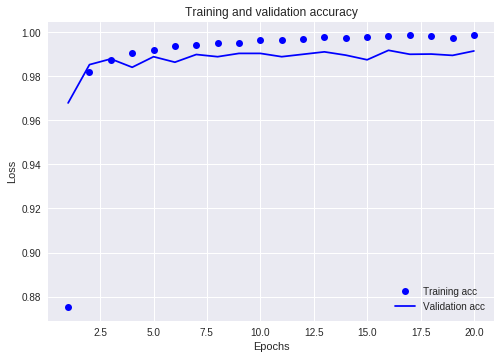

Learning rate= 0.005
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 161s - loss: 0.6413 - acc: 0.8884 - val_loss: 0.1954 - val_acc: 0.9747
Epoch 2/20
 - 161s - loss: 0.1097 - acc: 0.9814 - val_loss: 0.0786 - val_acc: 0.9833
Epoch 3/20
 - 161s - loss: 0.0582 - acc: 0.9877 - val_loss: 0.0522 - val_acc: 0.9868
Epoch 4/20
 - 163s - loss: 0.0412 - acc: 0.9901 - val_loss: 0.0389 - val_acc: 0.9899
Epoch 5/20
 - 163s - loss: 0.0316 - acc: 0.9921 - val_loss: 0.0438 - val_acc: 0.9868
Epoch 6/20
 - 160s - loss: 0.0253 - acc: 0.9937 - val_loss: 0.0447 - val_acc: 0.9867
Epoch 7/20
 - 159s - loss: 0.0214 - acc: 0.9946 - val_loss: 0.0276 - val_acc: 0.9915
Epoch 8/20
 - 157s - loss: 0.0182 - acc: 0.9956 - val_loss: 0.0396 - val_acc: 0.9876
Epoch 9/20
 - 155s - loss: 0.0149 - acc: 0.9961 - val_loss: 0.0341 - val_acc: 0.9900
Epoch 10/20
 - 155s - loss: 0.0135 - acc: 0.9962 - val_loss: 0.0280 - val_acc: 0.9913
Epoch 11/20
 - 155s - loss: 0.0125 - acc: 0.9965 - val_loss: 0.0343 - val_acc:

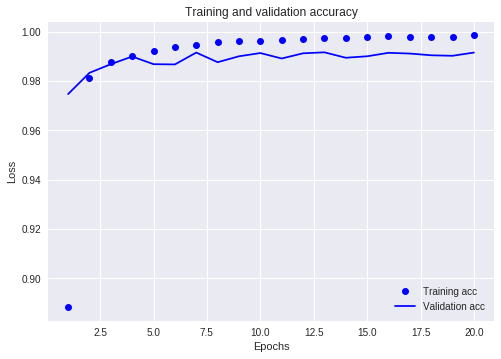

Learning rate= 0.002
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 161s - loss: 0.5894 - acc: 0.8836 - val_loss: 0.1739 - val_acc: 0.9779
Epoch 2/20


KeyboardInterrupt: ignored

In [0]:
def model_batchn(lr):
    model = Sequential()
    model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu')) 
    model.add(Conv2D(16, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu')) 
    model.add(Conv2D(16, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu')) 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu')) 
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu')) 
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    adam = Adam(lr=lr)
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'Adam' , metrics=[ 'accuracy' ])
    return model

for x in [0.008, 0.005,0.002]: #Stopped after learning rate=0.008 before the question is to find the largest rate, so no need to run 0.005 and 0.002.
    print("Learning rate=",x)
    model = model_batchn(x)
    t0=time.time()
    log = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2) # I reduce the epoch here before it takes much longer to run and the result seems very promising.
    t1=time.time()
    print(t1-t0," seconds")
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("CNN Error: %.2f%%" % (100-scores[1]*100))
    #ploting
    history_dict =log.history
    plt.clf()
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    epochs = range(1, len(acc_values) + 1)
    plt.plot(epochs, acc_values, 'bo', label='Training acc')
    plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

### Quiz.

#### 1. 
What are the advantages of a CNN over a fully connected ANN for image classificaion?
ANSWER: CNN is more efficient as it focuses the connections between nearby pixels. These are more relevant for image classification and the number of parameters are reduced.

#### 2. 
Consider a CNN composed of 3 convolutional layers, each with 3x3 kernels, a stride of 2, and with 'same' padding. The first layer outputs a featuremap with 100 cahnnels, the second layer outputs a featuremap with 200 depth, and the last outputs one with 400 depth. The input is color (RGB) images of 200x300 pixels. What is the total number of parameters for this CNN model?
ANSWER:
Conv layer 1: (3*3*3+1)*100 =2800
Conv layer 2: (3*3*100+1)*200=180200
Conv layer 3: (3*3*200+1)*400=720400
Total: 903,400


#### 3.
If your GPU runs out of memory while you train a CNN model, what can you do resolving the issue? List at least 3 ways to 
ANSWER:
a. Redeisgn the model, so we will have fewer layers and/or parameters;
b. Reduce the batch size, so less data is needed to be stored in the memory;
c. We always have the last option to get a better GPU with more memory, or add a new GPU and run the model with more GPUs.